# 🤖 **Machine Learning Classification: Drug Prescription Prediction**

**Author:** Nadia Rozman  
**Date:** January 2026  
**Objective:** Compare 7 classification algorithms for drug prescription prediction

## **Project Overview**
This notebook implements and compares multiple machine learning classification algorithms to predict the most appropriate drug prescription for patients based on their medical characteristics.

**Models Implemented:**
1. Gaussian Naive Bayes
2. Multinomial Naive Bayes
3. Bernoulli Naive Bayes
4. Logistic Regression
5. Decision Tree
6. Random Forest
7. K-Nearest Neighbors (KNN)
8. Support Vector Machine (SVM)

### **⚠️ DISCLAIMER**

- This dataset and project are part of a Data Science Bootcamp task.

- The data is **synthetic/educational** and does **not represent any real company, patient, or medical advice**.

- The results of this project should be interpreted for **learning purposes only**.

### **Import Libraries**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict, cross_validate
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

### **Load and Explore Data**

In [ ]:
data_path = 'ML_Classification_Drug_Prediction/data/drug_prescription_dataset.csv'
df = pd.read_csv(data_path)

print("Dataset Preview:\n", df.head())
print("\nShape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nTarget Distribution:\n", df['Drug'].value_counts())

Dataset Preview:
    Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

Shape: (200, 6)

Data Types:
 Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

Missing Values:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Target Distribution:
 Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


### **Data Preprocessing**

**Encode Features & Target**

In [19]:
# One-Hot Encode categorical features
X_encoded = pd.get_dummies(df, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

# Label Encode the target variable
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(df['Drug'])

# Features & Target
X = X_encoded.drop('Drug', axis=1)
Y = Y_encoded

print("Encoded Features Shape:", X.shape)
print("Encoded Target Shape:", Y.shape)

Encoded Features Shape: (200, 6)
Encoded Target Shape: (200,)


**Train–Test Split (Stratified)**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)

Training Set: (140, 6) (140,)
Testing Set: (60, 6) (60,)


### **Unified Evaluation Framework**

In [21]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(name, model, scale=False):
    """Cross-validate model and return Accuracy and F1 Macro"""
    steps = []
    if scale:
        steps.append(('scaler', StandardScaler()))
    steps.append(('model', model))

    pipeline = Pipeline(steps)

    scores = cross_validate(
        pipeline,
        X, Y,
        cv=cv,
        scoring=['accuracy', 'f1_macro'],
        return_train_score=False
    )

    return {
        'Model': name,
        'Accuracy (CV)': scores['test_accuracy'].mean(),
        'F1 Macro (CV)': scores['test_f1_macro'].mean()
    }

### **Function for Test Set Evaluation**

In [22]:
# List to store results
results_list = []

# Reusable function to evaluate on test set
def evaluate_test_model(model, X_train, X_test, y_train, y_test, model_name, scale=False):
    """
    Trains model on train set, evaluates on test set, prints metrics and shows confusion matrix.
    Returns dictionary of results.
    """
    # Scaling if required
    if scale:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    # Fit model
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f"\n{'='*60}")
    print(f"{model_name} – Test Set Evaluation")
    print(f"{'='*60}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Macro F1:  {f1:.4f}\n")
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix – {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
    
    return {'Model': model_name, 'Accuracy (Test)': acc, 'F1 Macro (Test)': f1}

### **Individual Model Evaluation (Test Set)**

**Gaussian Naive Bayes**


Gaussian NB – Test Set Evaluation
Accuracy: 0.7833
Macro F1:  0.7752

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         7
           1       0.80      0.80      0.80         5
           2       0.56      1.00      0.71         5
           3       1.00      0.94      0.97        16
           4       0.94      0.59      0.73        27

    accuracy                           0.78        60
   macro avg       0.76      0.87      0.78        60
weighted avg       0.86      0.78      0.79        60



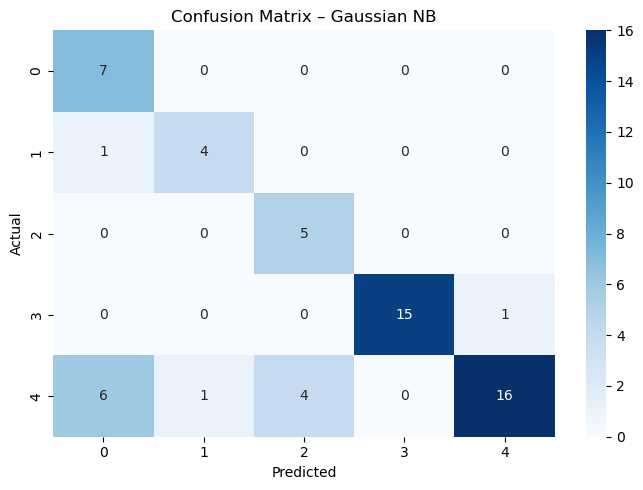

In [23]:
# Gaussian Naive Bayes
results_list.append(evaluate_test_model(GaussianNB(), X_train, X_test, y_train, y_test, "Gaussian NB"))

**Multinomial Naive Bayes**


Multinomial NB – Test Set Evaluation
Accuracy: 0.5833
Macro F1:  0.2735

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.90      0.56      0.69        16
           4       0.52      0.96      0.68        27

    accuracy                           0.58        60
   macro avg       0.28      0.31      0.27        60
weighted avg       0.47      0.58      0.49        60



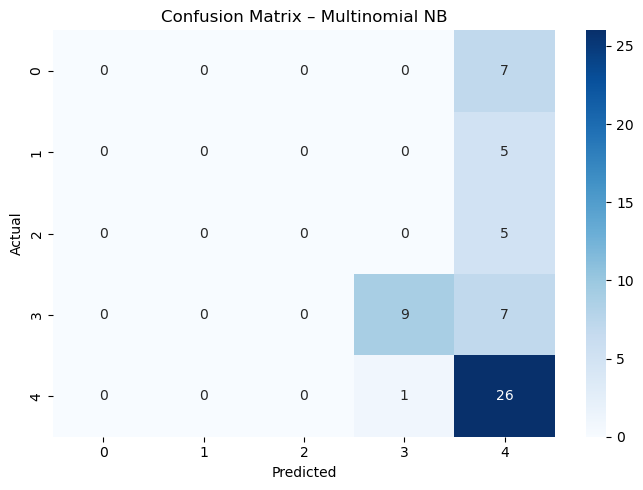

In [24]:
# Multinomial NB (scale features to [0,1])
from sklearn.preprocessing import MinMaxScaler
mnb_scaler = MinMaxScaler()
results_list.append(evaluate_test_model(MultinomialNB(), 
                                        mnb_scaler.fit_transform(X_train), 
                                        mnb_scaler.transform(X_test), 
                                        y_train, y_test, "Multinomial NB"))

**Bernoulli Naive Bayes**


Bernoulli NB – Test Set Evaluation
Accuracy: 0.5000
Macro F1:  0.3343

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         5
           2       0.50      0.60      0.55         5
           3       0.60      0.56      0.58        16
           4       0.46      0.67      0.55        27

    accuracy                           0.50        60
   macro avg       0.31      0.37      0.33        60
weighted avg       0.41      0.50      0.45        60



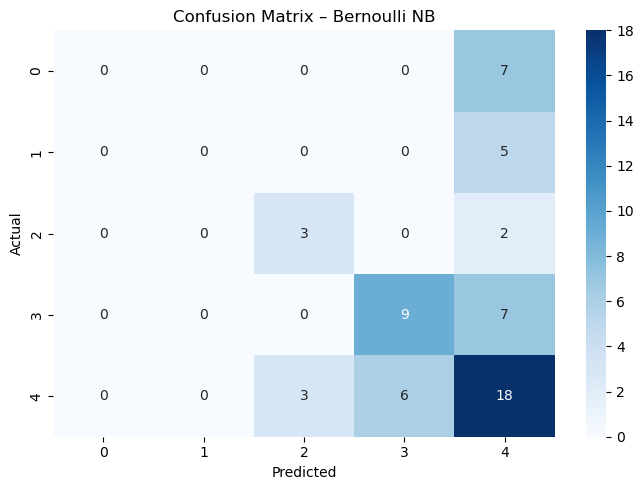

In [25]:
# Bernoulli NB (scale features to [0,1])
bnb_scaler = MinMaxScaler()
results_list.append(evaluate_test_model(BernoulliNB(), 
                                        bnb_scaler.fit_transform(X_train), 
                                        bnb_scaler.transform(X_test), 
                                        y_train, y_test, "Bernoulli NB"))

**Logistic Regression**


Logistic Regression – Test Set Evaluation
Accuracy: 0.8333
Macro F1:  0.8124

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       0.80      0.80      0.80         5
           2       0.56      1.00      0.71         5
           3       0.94      1.00      0.97        16
           4       1.00      0.67      0.80        27

    accuracy                           0.83        60
   macro avg       0.79      0.89      0.81        60
weighted avg       0.89      0.83      0.84        60



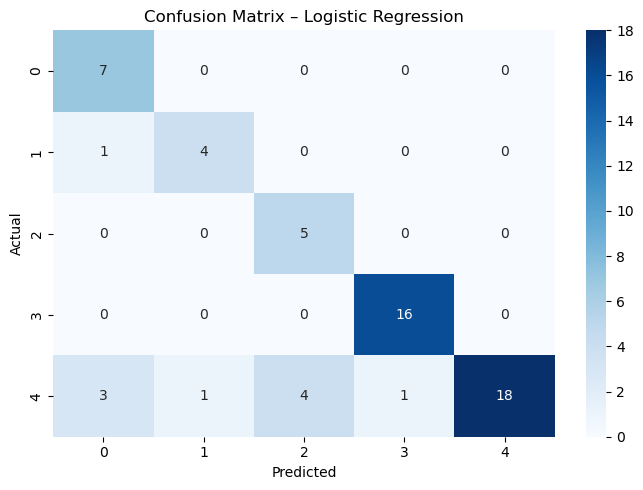

In [26]:
# Logistic Regression (requires scaling)
results_list.append(evaluate_test_model(LogisticRegression(max_iter=1000, class_weight='balanced'), 
                                        X_train, X_test, y_train, y_test, "Logistic Regression", scale=True))

**Decision Tree**


Decision Tree – Test Set Evaluation
Accuracy: 0.9833
Macro F1:  0.9644

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        27

    accuracy                           0.98        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.99      0.98      0.98        60



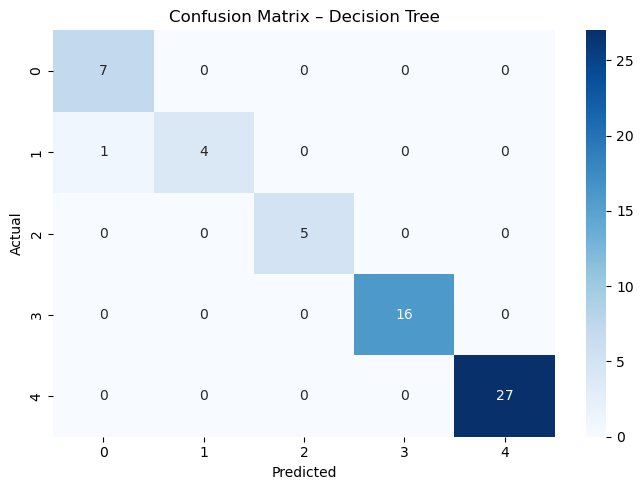

In [27]:
# Decision Tree
results_list.append(evaluate_test_model(DecisionTreeClassifier(max_depth=4, class_weight='balanced', random_state=42),
                                        X_train, X_test, y_train, y_test, "Decision Tree"))

**Random Forest**


Random Forest – Test Set Evaluation
Accuracy: 0.9667
Macro F1:  0.9250

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        27

    accuracy                           0.97        60
   macro avg       0.96      0.92      0.93        60
weighted avg       0.97      0.97      0.96        60



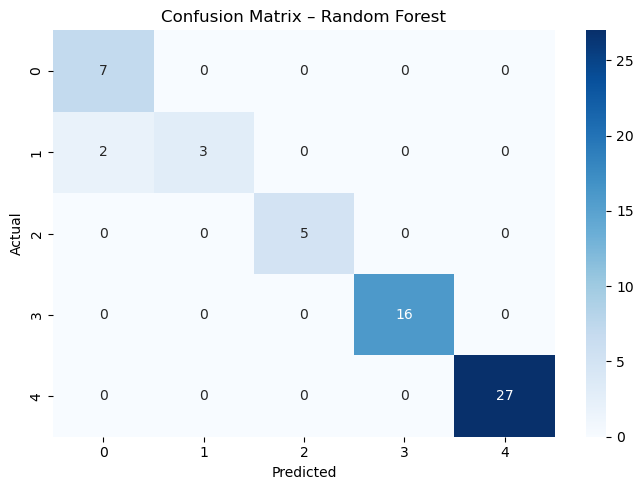

In [28]:
# Random Forest
results_list.append(evaluate_test_model(RandomForestClassifier(n_estimators=200, max_depth=4, class_weight='balanced', random_state=42),
                                        X_train, X_test, y_train, y_test, "Random Forest"))

**K-Nearest Neighbors (KNN)**


K-Nearest Neighbors – Test Set Evaluation
Accuracy: 0.7667
Macro F1:  0.7476

Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70         7
           1       1.00      0.60      0.75         5
           2       0.57      0.80      0.67         5
           3       0.83      0.94      0.88        16
           4       0.89      0.63      0.74        27

    accuracy                           0.77        60
   macro avg       0.77      0.79      0.75        60
weighted avg       0.82      0.77      0.77        60



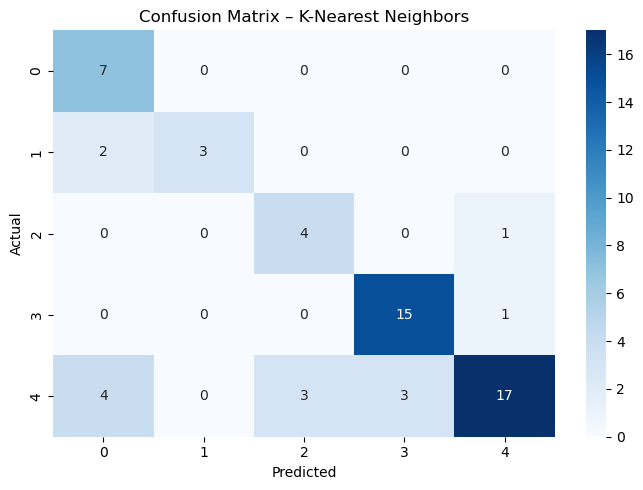

In [29]:
# K-Nearest Neighbors (requires scaling)
results_list.append(evaluate_test_model(KNeighborsClassifier(n_neighbors=18),
                                        X_train, X_test, y_train, y_test, "K-Nearest Neighbors", scale=True))

**Support Vector Machine (SVM)**


Support Vector Machine – Test Set Evaluation
Accuracy: 0.8333
Macro F1:  0.8124

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       0.80      0.80      0.80         5
           2       0.56      1.00      0.71         5
           3       0.94      1.00      0.97        16
           4       1.00      0.67      0.80        27

    accuracy                           0.83        60
   macro avg       0.79      0.89      0.81        60
weighted avg       0.89      0.83      0.84        60



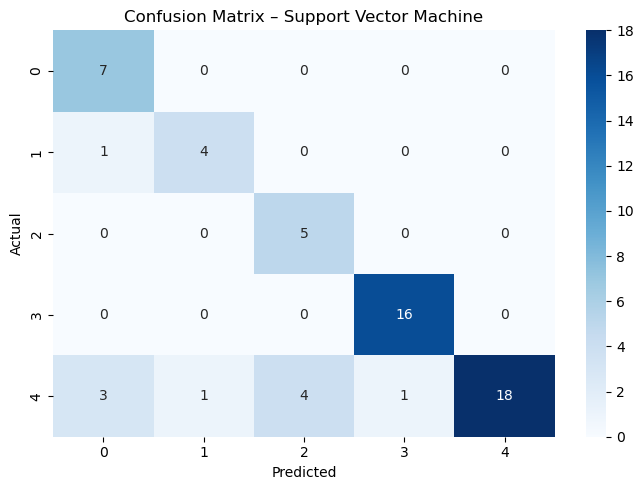

In [30]:
# Support Vector Machine (requires scaling)
results_list.append(evaluate_test_model(SVC(kernel='rbf', gamma='scale', class_weight='balanced'),
                                        X_train, X_test, y_train, y_test, "Support Vector Machine", scale=True))

### **Test Set Performance Summary**


🔹 Test Set Performance Summary 🔹
                    Model  Accuracy (Test)  F1 Macro (Test)
0           Decision Tree         0.983333         0.964444
1           Random Forest         0.966667         0.925000
2     Logistic Regression         0.833333         0.812352
3  Support Vector Machine         0.833333         0.812352
4             Gaussian NB         0.783333         0.775193
5     K-Nearest Neighbors         0.766667         0.747630
6            Bernoulli NB         0.500000         0.334311
7          Multinomial NB         0.583333         0.273526

✓ Saved: Test_Set_Accuracy_Comparison.png


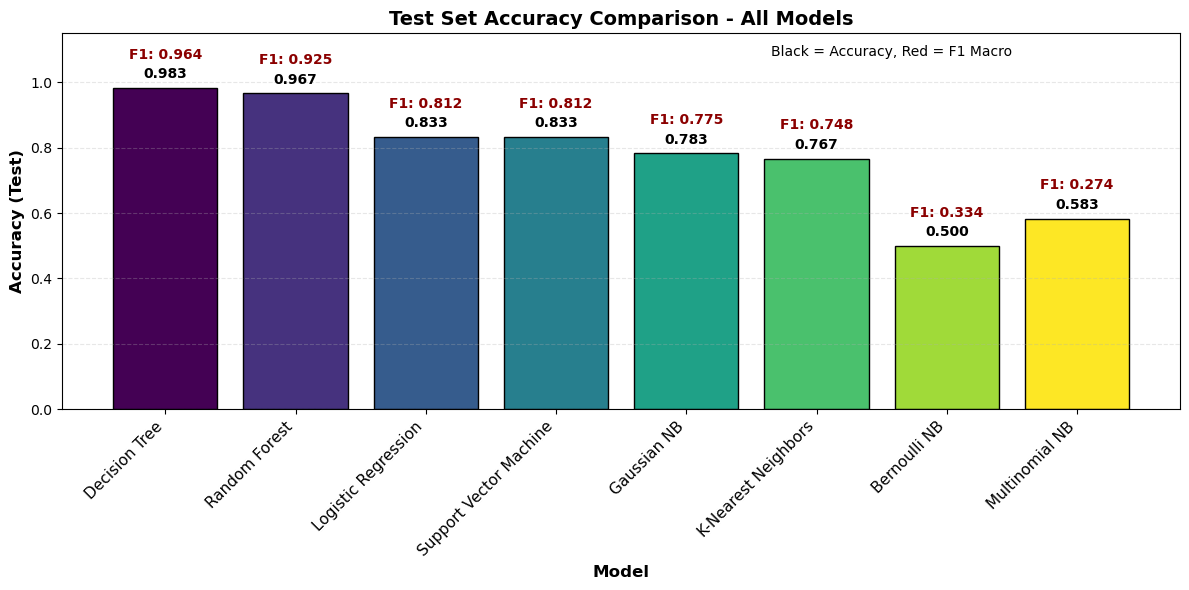

In [37]:
# Compile results
test_results_df = pd.DataFrame(results_list)
test_results_df = test_results_df.sort_values('F1 Macro (Test)', ascending=False).reset_index(drop=True)

print("\n🔹 Test Set Performance Summary 🔹")
print(test_results_df)

# Bar Plot Visualization & Save
plt.figure(figsize=(12,6)) 
colors = plt.cm.viridis(np.linspace(0,1,len(test_results_df)))
bars = plt.bar(test_results_df['Model'], test_results_df['Accuracy (Test)'], color=colors, edgecolor='black')

# Annotate Accuracy & F1 Macro
for bar, f1 in zip(bars, test_results_df['F1 Macro (Test)']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02, f'{height:.3f}', 
             ha='center', va='bottom', fontweight='bold')
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.08, f'F1: {f1:.3f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=10, color='darkred')

plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (Test)', fontsize=12, fontweight='bold')
plt.title('Test Set Accuracy Comparison - All Models', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.ylim(0, 1.15)
plt.text(6.5, 1.08, "Black = Accuracy, Red = F1 Macro", fontsize=10, color='black', ha='right')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('../images/Test_Set_Accuracy_Comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: Test_Set_Accuracy_Comparison.png")
plt.show()